## Metric used in alternate approach
- The S metric that is used in the alternate approach, does it have only a single minima as we iterate over our phase range given that we have measured the **P0 and P1** for a particular random $|\phi \rangle$
- NOTE : even if the unitary matrix is **n-qubit**, the metric structure does not depend on it. Why? because the theoretical probabilities are a function of the number of dimensions present in the control *qudit* and not any other thing.
$$ S = \sum_{i=0}^{n-1}(P_{i} - C(i,\phi))^{2}$$

In [1]:
import numpy as np 

In [2]:
import random 
import matplotlib.pyplot as plt 

In [4]:
def C(i,theta):
    if i == 0:
        return (np.cos(np.pi*(theta)))**2
    else:
        return (np.sin(np.pi*(theta)))**2

In [14]:
def S(p_list,angle_range):
    metric = []
    for theta in angle_range:
        #calc the cost 
        s=0
        for i in range(len(p_list)):
            s += (p_list[i]-C(i,theta))**2
        metric.append(s)    
    return metric

In [78]:
def exp_metric(p_list,angle_range):
    metric = []
    for theta in angle_range:
        #calc the cost 
        s=0
        for i in range(len(p_list)):
            s += (p_list[i]-C(i,theta))**2
        metric.append(np.exp(s))    
    return metric

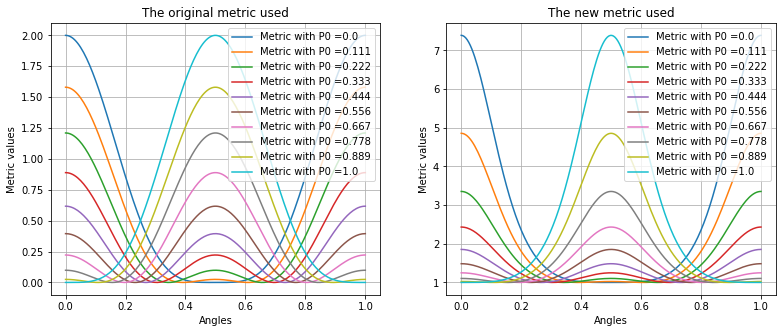

In [82]:
angles = np.linspace(0,1,200)
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
plt.title("The original metric used")
for a in np.linspace(0,1,10):
    metric = S([a,1-a],angles)
    plt.plot(angles,metric, label = 'Metric with P0 ='+str(round(a,3)))
plt.xlabel("Angles")
plt.ylabel("Metric values")
plt.legend(loc=0)
plt.grid()

plt.subplot(1,2,2)
plt.title("The new metric used")
for a in np.linspace(0,1,10):
    metric = exp_metric([a,1-a],angles)
    plt.plot(angles,metric, label = 'Metric with P0 ='+str(round(a,3)))
plt.xlabel("Angles")
plt.ylabel("Metric values")
plt.legend(loc=0)
plt.grid()

- Metric should be a function of $\phi$ and the experimental probabilities attained.
- $f(a,1-a,\phi)$ where $ \phi\ \epsilon\ [0,1]$ such that $f$ has a **unique minima** in the domain